In [3]:
import cv2
import os

In [4]:
os.getcwd()

'C:\\Users\\SHIVAM'

In [13]:
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
# load the photograph
pixels = cv2.imread('test1.jpg',cv2.IMREAD_UNCHANGED)

In [14]:
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    print(box)

[173  74 108 108]
[363 104  97  97]


In [16]:

# extract
x, y, width, height = box
x2, y2 = x + width, y + height
# draw a rectangle over the pixels
cv2.rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       ...,

       [[112, 123, 145],
        [124, 135, 157],
        [133, 141, 164],
        ...,
        [ 97, 169, 241],
        [ 98, 167, 240],
        [ 96, 168, 240]],

       [[146, 158, 186],
        [151, 163, 191],
        [148, 160, 188],
        ...,
        [ 99, 170, 238],
        [ 99, 168, 238],
        [ 98, 168, 238]],

       [[143, 153, 183],
        [145, 155, 185],
        [139, 149, 179],
        ...,
        [ 99, 169, 236],
        [101, 168, 237],
        [ 99, 168, 237]]

In [17]:
cv2.imshow('face detection', pixels)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

In [7]:
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('D:PHOTOS/Engg_1&2_year/DSC_0144.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
# bboxes = classifier.detectMultiScale(pixels)

# perform face detection
bboxes = classifier.detectMultiScale(pixels, 5.7,1)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

In [ ]:
def detect_multiple_face(image_path):
    pixels = imread(image_path, cv2.IMREAD_UNCHANGED)
    classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
    # perform face detection
    bboxes = classifier.detectMultiScale(pixels, 1.1, 1)
    for box in bboxes:
        # extract
        x, y, width, height = box
        x2, y2 = x + width, y + height
        # draw a rectangle over the pixels
        rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
    cv2.imwrite("test.jpg")
    detected_img = cv2.read("test.jpg", cv2.IMREAD_UNCHANGED)
    return detected_img
    

# Deep learning


one of the more popular approaches is called the “Multi-Task Cascaded Convolutional Neural Network,” or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

In [8]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 

In [9]:

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()


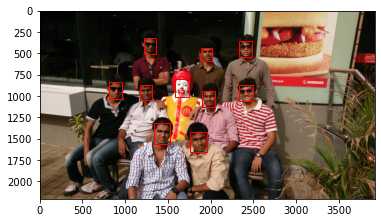

In [10]:
 
filename = 'D:PHOTOS/Engg_1&2_year/DSC_0144.jpg'
# load image from file
pixels =pyplot.imread(filename)

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

# Real time face detection

In [ ]:
from tensorflow.keras.applications import ResNet50

img_height, img_width = 250, 250  # size of images

base_model = ResNet50(weights='imagenet', 
                      include_top = False, 
                      # without dense part of the network
                      input_shape = (img_height, img_width, 3))

In [ ]:
from tensorflow.keras.applications import ResNet50

model_without_top = ResNet50(weights='imagenet',
                             include_top=False,  
                             # without dense part of the network
                             input_shape=(img_height, img_width, 3))

model_with_top = ResNet50(weights='imagenet',
                          include_top=True,  
                          # with dense part of the network
                          input_shape=(224, 224, 3))

model_without_top.summary()
model_with_top.summary()

In [ ]:
from tensorflow import keras

# Set layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
global_avg_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='sigmoid')(global_avg_pooling)

face_classifier = keras.models.Model(inputs=base_model.input,
                                     outputs=output,
                                     name='ResNet50')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# ModelCheckpoint to save model in case of 
# interrupting the learning process
checkpoint = ModelCheckpoint("models/face_classifier.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=3,  # number of epochs with 
                                       # no improvement after which 
                                       # training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]
face_classifier.compile(loss='categorical_crossentropy',
                        optimizer=Adam(learning_rate=0.01),
                        metrics=['accuracy'])

In [ ]:
epochs = 50

history = face_classifier.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds)

face_classifier.save("models/face_classifier.h5")

In [1]:
import cv2 # OpenCV

# opencv object that will detect faces for us
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)  # webcamera

if not video_capture.isOpened():
    print("Unable to access the camera")
else:
    print("Access to the camera was successfully obtained")

print("Streaming started")
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        # for each face on the image detected by OpenCV
        # draw a rectangle around the face
        cv2.rectangle(frame, 
                      (x, y), # start_point
                      (x+w, y+h), # end_point
                      (255, 0, 0),  # color in BGR
                      2) # thickness in px
        
    # Display the resulting frame
    cv2.imshow("Face detector - to quit press ESC", frame)

    # Exit with ESC
    key = cv2.waitKey(1)
    if key % 256 == 27: # ESC code
        break
        
# When everything done, release the capture
video_capture.release()
cv2.destroyAllWindows()
print("Streaming ended")

Access to the camera was successfully obtained
Streaming started


KeyboardInterrupt: 

In [42]:

#Apply the above logic to a live video
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#Check if your system can detect camera and what is the source number
# cams_test = 10
# for i in range(0, cams_test):
#     cap = cv2.VideoCapture(i)
#     test, frame = cap.read()
#     print("i : "+str(i)+" /// result: "+str(test))


cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 1)
    
    #First detect face and then look for eyes inside the face.
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         for (ex,ey,ew,eh) in eyes:
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:      #Press Esc to stop the video
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
import cv2
import sys

cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()
